In [1]:
import pandas as pd
import numpy as np
import glob
from datetime import datetime
import matplotlib.pyplot as plt
import pickle

In [2]:
#Loading topicwise news from different sources
#Hindu
list1 = sorted(glob.glob('./HINDU DATA/*.csv')) #glob returns list of filenames in a directory
hindu = [pd.read_csv(csv,index_col=False) for csv in list1]
#NDTV
list2 = sorted(glob.glob('./NDTV DATA/*.csv'))
ndtv = [pd.read_csv(csv,index_col=False) for csv in list2]
#India Today
list3 = sorted(glob.glob('./INDIA TODAY DATA/*.csv'))
IT = [pd.read_csv(csv,index_col=False) for csv in list3]
#Tribune
list4 = sorted(glob.glob('./TRIBUNE DATA/*.csv'))
tribune = [pd.read_csv(csv,index_col=False) for csv in list4]

In [3]:
#Topics
topics = ['demonetisation', 'beef_ban', 'Rafale_jets', 'swachh', 'GST', 'FDI', 'aadhar', 'adarsh_scam', 'digital_india','coal_scam', 'chopper', 'Karnataka_election', 'UP_elections', 'Sabarimala', '2g_scam']

In [4]:
#removing na values
for csv in tribune:
    csv.dropna(inplace=True)
for csv in hindu:
    csv.dropna(inplace=True)
for csv in ndtv:
    csv.dropna(inplace=True)
for csv in IT:
    csv.dropna(inplace=True)

In [71]:
#Taking average sentiment
scale = 10
hindu_senti = [scale*(csv['Sentiment'].mean()-0.06) for csv in hindu]
ndtv_senti = [scale*(csv['Sentiment'].mean()-0.06) for csv in ndtv]
IT_senti = [scale*(csv['Sentiment'].mean()-0.06) for csv in IT]
tribune_senti = [scale*(csv['senti'].mean()-0.06) for csv in tribune]
tribune_senti.insert(11,0.05)
tribune_senti+=[0.05]

In [43]:
import seaborn as sns

In [47]:
y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
z = [0.15, 0.3, 0.45, 0.6, 0.75]
n = [58, 651, 393, 203, 123]

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(lbl):
    ax.annotate(txt, (hindu_senti[i], topics[i]))

['seaborn-whitegrid', 'seaborn-talk', 'seaborn-paper', 'seaborn-poster', 'fast', 'Solarize_Light2', 'seaborn-muted', '_classic_test', 'classic', 'seaborn', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-deep', 'dark_background', 'seaborn-notebook', 'ggplot', 'seaborn-ticks', 'seaborn-darkgrid', 'seaborn-pastel', 'bmh', 'grayscale', 'fivethirtyeight', 'tableau-colorblind10', 'seaborn-bright', 'seaborn-white']


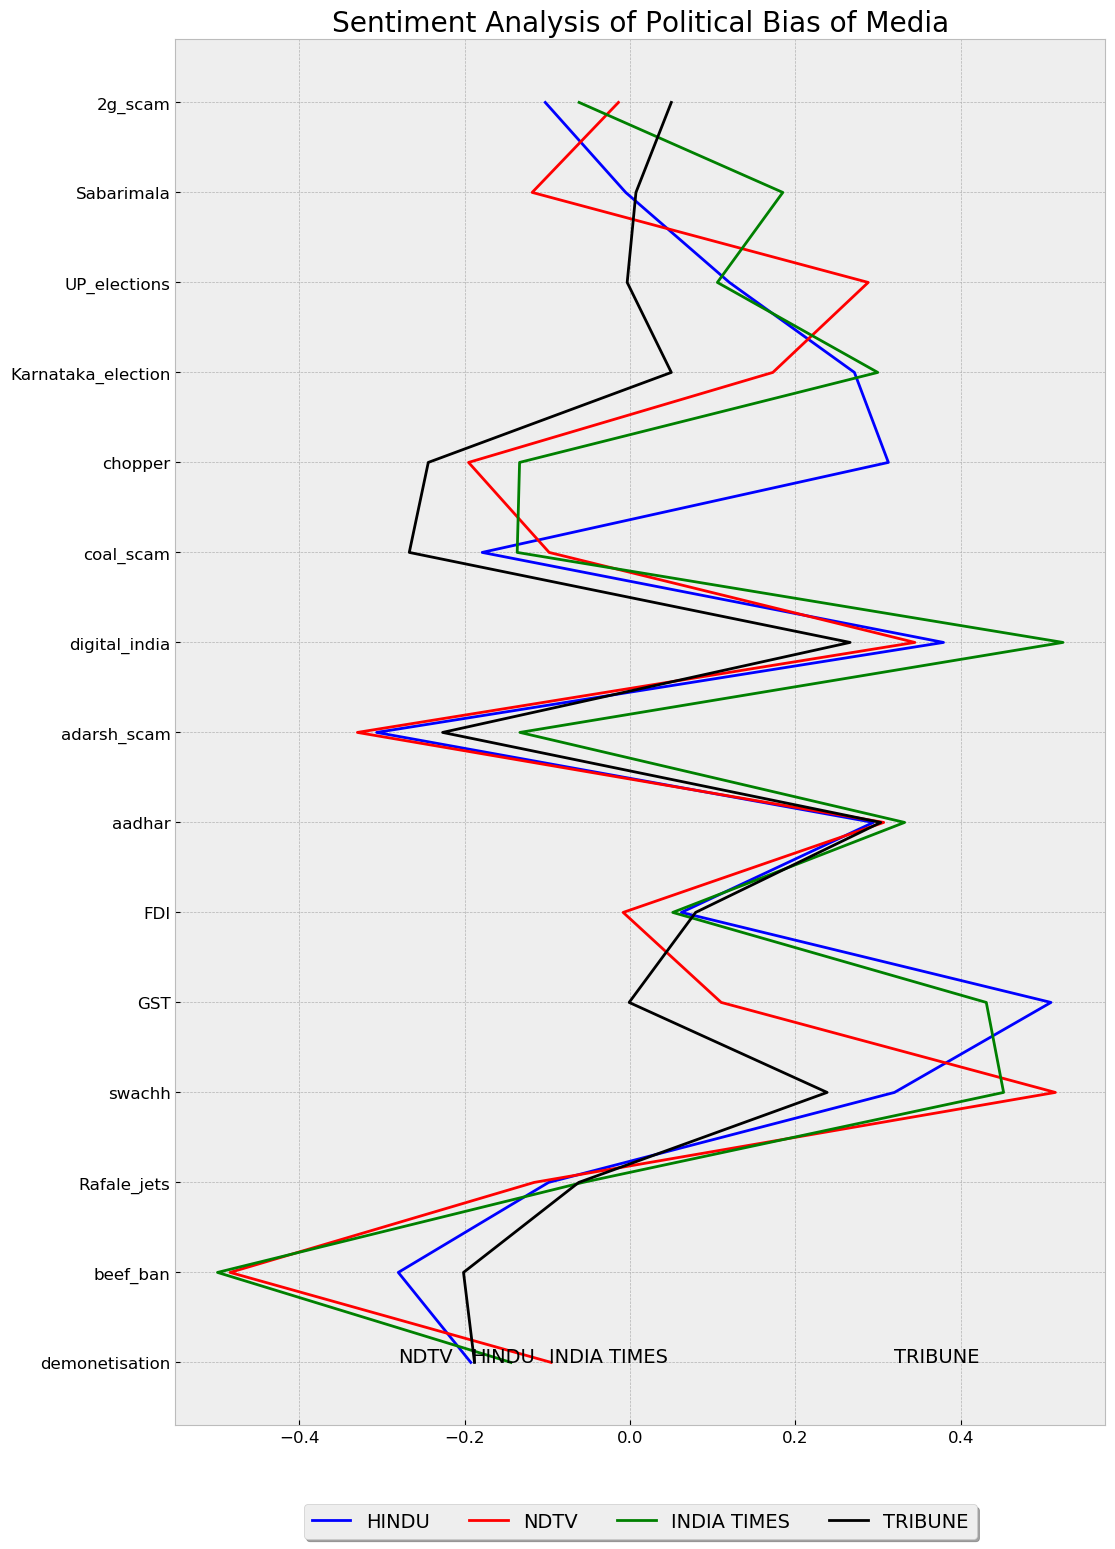

In [77]:
lbl = ['HINDU', 'NDTV','INDIA TIMES','TRIBUNE']
plt.style.use('bmh')
plt.rc('font', size=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['figure.figsize'] = (12,18)
plt.title('Sentiment Analysis of Political Bias of Media')
plt.plot(hindu_senti, topics,c='blue',label = lbl[0])
for i,txt in enumerate(lbl):
    plt.annotate(txt,(hindu_senti[i],topics[0]))
plt.plot(ndtv_senti, topics,c='red',label = lbl[1])
plt.plot(IT_senti, topics,c='green',label = lbl[2])
plt.plot(tribune_senti, topics,c='black',label = lbl[3])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=4)


In [26]:
tribune[0]

,Date,Title,Article,clean title,clean article,polarity,cong,bjp,senti
0,2016-11-08,high-value notes demonetisation: it’s 1978 redux!,"new delhi, november 8 the sudden move to demon...",high-value notes demonetisation : ’ 1978 redux !,"new delhi , november 8 sudden move demonetise ...","{'bjp': 0, 'cong': 0}",0,0,0.132765
1,2016-11-08,"'withdrawal of rs 500, rs 1,000 notes surgical...","new delhi, november 8 government's move to wit...","' withdrawal rs 500 , rs 1,000 notes surgical ...","new delhi , november 8 government ' move withd...","{'bjp': 0, 'cong': 3}",3,0,-0.044724
2,2016-11-09,cash withdrawal limits to ease with supply of ...,"new delhi, november 9 cash withdrawal restrict...","cash withdrawal limits ease supply new notes ,...","new delhi , november 9 cash withdrawal restric...","{'bjp': 0, 'cong': 0}",0,0,0.089237
3,2016-11-09,"banks to remain open this sat, sun","new delhi, november 9 having junked 86 per cen...","banks remain open sat , sun","new delhi , november 9 junked 86 per cent tota...","{'bjp': 0, 'cong': 0}",0,0,0.069679
4,2016-11-09,rahul gandhi questions government's demonetisa...,"aditi tandon new delhi, november 9 congress v...",rahul gandhi questions government ' demonetisa...,"aditi tandon new delhi , november 9 congress v...","{'bjp': 0, 'cong': 2}",2,0,-0.087814
5,2016-11-09,the tribune pages on 1978 demonetisation,in a bold step on the economic front on januar...,tribune pages 1978 demonetisation,"bold step economic front january 17 , 1978 , j...","{'bjp': 0, 'cong': 0}",0,0,0.133333
6,2016-11-09,demonetisation move to create corruption-free ...,"new delhi, november 9 the decision to scrap r...",demonetisation move create corruption-free ind...,"new delhi , november 9 decision scrap rs 500 r...","{'bjp': 0, 'cong': 0}",0,0,0.179252
7,2016-11-09,rbi issues new series of notes,"mumbai, november 8hours after pm modi announce...",rbi issues new series notes,"mumbai , november 8hours pm modi announced dem...","{'bjp': 0, 'cong': 0}",0,0,-0.003434
8,2016-11-09,"why rs 2,000 note, asks surjewala; sp backs go...","new delhi, november 8 across the political sp...","rs 2,000 note , asks surjewala ; sp backs govt...","new delhi , november 8 across political spectr...","{'bjp': 2, 'cong': 3}",3,2,0.050319
9,2016-11-10,i-t surveys in several cities over illegal cur...,"new delhi, november 10 the income tax departme...",i-t surveys several cities illegal currency ex...,"new delhi , november 10 income tax department ...","{'bjp': 0, 'cong': 0}",0,0,-0.001476


In [32]:
for i in range(13):
    tribune[i]['Date'] = pd.to_datetime(tribune[i]['Date'], format='%Y-%m-%d', exact=False)

In [36]:
temp_date_mask = (tribune[0]['Date'] > '2016-11-08') & (tribune[0]['Date'] <= '2016-11-09')

In [37]:
tribune[0].loc[temp_date_mask]

,Date,Title,Article,clean title,clean article,polarity,cong,bjp,senti
2,2016-11-09,cash withdrawal limits to ease with supply of ...,"new delhi, november 9 cash withdrawal restrict...","cash withdrawal limits ease supply new notes ,...","new delhi , november 9 cash withdrawal restric...","{'bjp': 0, 'cong': 0}",0,0,0.089237
3,2016-11-09,"banks to remain open this sat, sun","new delhi, november 9 having junked 86 per cen...","banks remain open sat , sun","new delhi , november 9 junked 86 per cent tota...","{'bjp': 0, 'cong': 0}",0,0,0.069679
4,2016-11-09,rahul gandhi questions government's demonetisa...,"aditi tandon new delhi, november 9 congress v...",rahul gandhi questions government ' demonetisa...,"aditi tandon new delhi , november 9 congress v...","{'bjp': 0, 'cong': 2}",2,0,-0.087814
5,2016-11-09,the tribune pages on 1978 demonetisation,in a bold step on the economic front on januar...,tribune pages 1978 demonetisation,"bold step economic front january 17 , 1978 , j...","{'bjp': 0, 'cong': 0}",0,0,0.133333
6,2016-11-09,demonetisation move to create corruption-free ...,"new delhi, november 9 the decision to scrap r...",demonetisation move create corruption-free ind...,"new delhi , november 9 decision scrap rs 500 r...","{'bjp': 0, 'cong': 0}",0,0,0.179252
7,2016-11-09,rbi issues new series of notes,"mumbai, november 8hours after pm modi announce...",rbi issues new series notes,"mumbai , november 8hours pm modi announced dem...","{'bjp': 0, 'cong': 0}",0,0,-0.003434
8,2016-11-09,"why rs 2,000 note, asks surjewala; sp backs go...","new delhi, november 8 across the political sp...","rs 2,000 note , asks surjewala ; sp backs govt...","new delhi , november 8 across political spectr...","{'bjp': 2, 'cong': 3}",3,2,0.050319


In [38]:
for i in range(15):
    hindu[i]['Date'] = pd.to_datetime(hindu[i]['Date'], format='%Y-%m-%d')
    IT[i]['Date'] = pd.to_datetime(IT[i]['Date'], format='%Y-%m-%d')
    ndtv[i]['Date'] = pd.to_datetime(ndtv[i]['Date'], format='%Y-%m-%d')

In [39]:
for i in range(13):
    tribune[i]['Date'] = pd.to_datetime(tribune[i]['Date'], format='%Y-%m-%d')    

In [41]:
# How to extract rows based on start date and end date
start_date = '2016-11-08'
end_date = '2016-11-09'
date_mask = (tribune[0]['Date'] > start_date) & (tribune[0]['Date'] <= end_date)

# Now access the dataframes with date_mask
# eg. ndtv[0].loc[date_mask]
IT[0].loc[date_mask]

,Date,Title,Article,Sentiment,clean title,clean article,polarity,cong,bjp
2,2016-11-11,"currency crackdown: with nowhere to go, black ...",scores of cash hoarders are following a wily t...,0.036504,"currency crackdown : nowhere go , black money ...",scores cash hoarders following wily train thou...,"{'bjp': 0, 'cong': 0}",0,0
3,2016-11-12,aamir on modi's demonetisation move: focus on ...,"at a recent event in mumbai, actor aamir khan ...",0.067262,aamir modi ' demonetisation move : focus natio...,"recent event mumbai , actor aamir khan spoke d...","{'bjp': 0, 'cong': 0}",0,0
4,2016-11-13,west bengal: crores deposited in banks in remo...,niti rani mondal (35) cannot write a word in a...,0.164963,west bengal : crores deposited banks remote vi...,niti rani mondal ( 35 ) cannot write word lang...,"{'bjp': 0, 'cong': 0}",0,0
5,2016-11-14,"pm modi's demonetisation is anti-farmer, alleg...",bahujan samaj party supremo mayawati has dismi...,-0.080264,"pm modi ' demonetisation anti-farmer , alleges...",bahujan samaj party supremo mayawati dismissed...,"{'bjp': 2, 'cong': 4}",4,2
6,2016-11-14,"demonetisation: atms remain shut today, malls ...",malls in delhi were the worst hit this weekend...,-0.085500,"demonetisation : atms remain shut today , mall...","malls delhi worst hit weekend , prime minister...","{'bjp': 0, 'cong': 0}",0,0
7,2016-11-14,"angry mamata hits out at pm modi, says poor ar...",hitting out at pm narendra modi on demonetisat...,-0.059091,"angry mamata hits pm modi , says poor sleeping...",hitting pm narendra modi demonetisation issue ...,"{'bjp': 1, 'cong': 1}",1,1
8,2016-11-14,pakistan summons indian envoy after 7 of its s...,pakistan foreign office has summoned indian hi...,-0.012315,pakistan summons indian envoy 7 soldiers kille...,pakistan foreign office summoned indian high c...,"{'bjp': 0, 'cong': 0}",0,0
